In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import pandas
data = pandas.read_csv('C:\\Users\\brofr\\Desktop\\МИРЭА\\НИР\\crime.csv')

In [3]:
data.shape
#Датасет содержит 486886 строк (объектов) и 19 столбцов (признаков).

(486886, 19)

#1.Содержит 486886 строк (объектов) и 19 столбцов (признаков).


In [4]:
#Первые 5 записей
data.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT ...,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST ...,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE ...,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE ...,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD ...,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0


#2. К категориальным признакам я бы отнесла 4 следующих признака – идентификатор дистрикта (округа) - столбец DISTRICT_ID, идентификатор категории преступления – столбец OFFENSE_CATEGORY_ID, код конкретного преступления, столбец OFFENSE_CODE, идентификатор участка, столбец PRECINCT_ID.


In [ ]:
#Последние 5 записей
data.tail()

#3. Это столбец OFFENSE_CODE, который является столбцом с максимальным количеством уникальных значений категориального признака. Там присутствует 154 различных значений.



#4. В наборе данных Denver Crime Data присутствует 2 бинарных признака: IS_CRIME и IS_TRAFFIC.


#5. Числовыми признаками набора данных являются 12 признаков: incident_id , offense_id, OFFENSE_CODE, OFFENSE_CODE_EXTENSION, GEO_X, GEO_Y, GEO_LON, GEO_LAT, DISTRICT_ID, PRECINCT_ID, IS_CRIME, IS_TRAFFIC.


In [ ]:
#Выведем информацию о наборе данных
data.info()

#6. Из таблицы видно, что в следующих 9 признаках есть пропуски: LAST_OCCURRENCE_DATE, INCIDENT_ADDRESS, GEO_X, GEO_Y, GEO_LON, GEO_LAT, DISTRICT_ID, PRECINCT_ID, NEIGHBORHOOD_ID. 

#7. Опираясь на предыдущую таблицу, посчитаем количество пропусков для каждого признака:
LAST_OCCURRENCE_DATE – 303919 пропусков;
INCIDENT_ADDRESS – 38901 пропусков;
GEO_X – 4179 пропусков;
GEO_Y – 4179 пропусков;
GEO_LON – 4180 пропусков;
GEO_LAT – 4180 пропусков;
DISTRICT_ID – 1 пропуск;
PRECINCT_ID – 1 пропуск;
NEIGHBORHOOD_ID – 1 пропуск.


#8. Столбец LAST_OCCURRENCE_DATE имеет наибольшее количество пропусков, всего в этом столбце 303919 пропусков.

In [5]:
#удалим строки с отсутствующими значениями
data = data.dropna( )
#после удаления стало 175634 объектов

In [ ]:
#Cтатистический анализ числовых столбцов
data.describe()

In [ ]:
#Корреляция признаков
data.corr()

In [ ]:
#Корреляция признаков на температурной таблице 
plt.figure(figsize=(12,10), dpi= 70)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#13. Выделим достаточно сильные линейные зависимости признаков:
•	Явно между собой отрицательно коррелируют признаки IS_CRIME и IS_TRAFFIC;
•	Также отрицательно зависимы между собой GEO_LAT с GEO_X, GEO_Y, GEO_LON, GEO_LAT;
•	Признаки IS_CRIME и OFFENSE_CODE тоже отрицательно коррелируют друг с другом;
•	Сильная положительная линейная зависимость присутствует между incident_id  и offense_id;
•	Еще сильная положительная линейная зависимость присутствует DISTRICT_ID и PRECINCT_ID;
•	Такая же сильная положительная корреляция наблюдается между GEO_X c GEO_Y, GEO_LON, GEO_LAT;
•	Еще положительно зависимы между собой IS_TRAFFIC и OFFENSE_CODE.

In [6]:
#Нормализация признаков через стандартное отклонение
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_std = scale_features_std.fit_transform(data[['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID', 'IS_CRIME', 'IS_TRAFFIC']])
features_std

array([[ 0.74410357, -0.39288761, -0.05866451, ...,  0.28746878,
         0.08801124, -0.0883064 ],
       [ 0.74410357, -0.39288761, -0.01004518, ..., -0.29246975,
         0.08801124, -0.0883064 ],
       [ 0.74410357, -0.39288761, -0.0427322 , ..., -1.38275419,
         0.08801124, -0.0883064 ],
       ...,
       [-0.13060298, -0.39288761, -0.02754145, ..., -0.87240828,
         0.08801124, -0.0883064 ],
       [ 0.16341603,  1.37827314,  0.03029995, ..., -0.22287713,
         0.08801124, -0.0883064 ],
       [ 0.16488612, -0.39288761, -0.04175368, ...,  1.45314523,
         0.08801124, -0.0883064 ]])

In [ ]:
#Для вопроса №9. Поищем выбросы, аномальные значения. Буду считать, что значение аномально, если его стандартное отклонение >= 5 по модулю

for i in range(0,175634):
    for j in range(0,12):
        if (features_std[i][j] >= 5) or (features_std[i][j] <= -5):
            print(i)
            print(j)

        

#9. Аномальные значения в достаточном количестве присутствуют в признаках incident_id, offense_id, GEO_X, GEO_Y, GEO_LON, GEO_LAT. 

In [ ]:
#Для вопроса №10. Пронормируем признаки через стандартное отклонение, и найдём столбец с самым большим средним значением
s = 0
for i in range(0,12):
    for j in range(0,175634):
        s += features_std[j][i]
    s = s/175634
    print(s)
    s = 0

#10. Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение - IS_CRIME.


In [7]:
data = data[['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID', 'IS_CRIME', 'IS_TRAFFIC']]
data[['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID', 'IS_CRIME', 'IS_TRAFFIC']] = features_std

#Выделяем целевую переменную 
target = data.OFFENSE_CODE
train = data.drop(['OFFENSE_CODE'], axis=1)


#11.Столбцом с целевым признаком является столбец OFFENSE_CODE, в котором содержится код о конкретном преступлении. 


In [63]:
train.head()

,incident_id,offense_id,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
0,0.833407,0.833407,-0.392888,-0.058665,-0.075164,-0.072032,-0.031950,0.329575,0.287469,0.088011,-0.088306
8,-0.611889,-0.611889,-0.392888,-0.010045,-0.070748,-0.010304,-0.029823,-0.255289,-0.292470,0.088011,-0.088306
9,-0.611890,-0.611890,-0.392888,-0.042732,-0.026668,-0.051722,-0.001050,-1.425015,-1.382754,0.088011,-0.088306
10,-0.611890,-0.611890,-0.392888,-0.068020,-0.005855,-0.083796,0.012655,-1.425015,-1.388554,0.088011,-0.088306
11,-0.611890,-0.611890,-0.392888,-0.022217,0.019956,-0.025589,0.028571,1.499301,1.511139,0.088011,-0.088306


In [8]:
#Выделяем тренировочную и тестовую выборки 
# y - целевая переменная(target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

122943 52691


#12. 122943 объектов попадает в тренировочную выборку.

In [9]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [67]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component,train.columns)))

1 component: 37.7% of initial variance
0.002 x incident_id + 0.002 x offense_id + 0.000 x OFFENSE_CODE_EXTENSION + 0.502 x GEO_X + 0.496 x GEO_Y + 0.502 x GEO_LON + -0.497 x GEO_LAT + 0.027 x DISTRICT_ID + 0.028 x PRECINCT_ID + 0.001 x IS_CRIME + -0.001 x IS_TRAFFIC
2 component: 20.87% of initial variance
0.689 x incident_id + 0.689 x offense_id + 0.057 x OFFENSE_CODE_EXTENSION + -0.004 x GEO_X + -0.002 x GEO_Y + -0.004 x GEO_LON + 0.008 x GEO_LAT + 0.106 x DISTRICT_ID + 0.106 x PRECINCT_ID + 0.112 x IS_CRIME + -0.112 x IS_TRAFFIC
3 component: 16.69% of initial variance
0.055 x incident_id + 0.055 x offense_id + -0.030 x OFFENSE_CODE_EXTENSION + -0.007 x GEO_X + -0.003 x GEO_Y + -0.006 x GEO_LON + 0.018 x GEO_LAT + 0.318 x DISTRICT_ID + 0.317 x PRECINCT_ID + -0.629 x IS_CRIME + 0.629 x IS_TRAFFIC
4 component: 16.23% of initial variance
0.146 x incident_id + 0.146 x offense_id + -0.019 x OFFENSE_CODE_EXTENSION + 0.013 x GEO_X + 0.014 x GEO_Y + 0.011 x GEO_LON + -0.029 x GEO_LAT + -0.622

#14. Четырёх признаков хватит для объяснения 90% дисперсии после применения метода PCA.

#15. Наибольший вклад в первую компоненту вносит признаки GEO_X,GEO_Y, GEO_LON, GEO_LAT.


C:\Users\brofr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


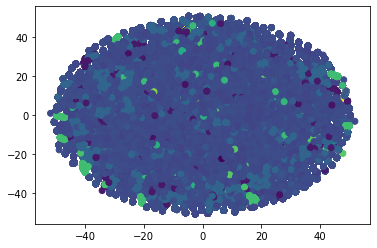

In [11]:
from sklearn.manifold import TSNE

tsne1 = TSNE(learning_rate=200, random_state=13)

transformed1 = tsne1.fit_transform(train)

x_axist1 = transformed1[:, 0]
y_axist1 = transformed1[:, 1]

plt.scatter(x_axist1, y_axist1, c=target)
plt.show()

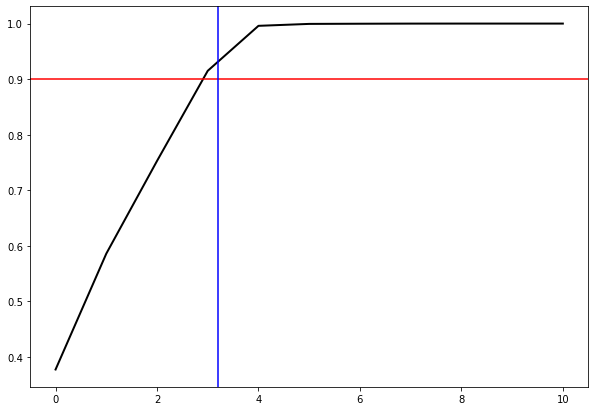

In [70]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(3.2, c='b')